In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
def grangers_causation_matrix(data, variables, maxlag, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [3]:
data = sm.datasets.macrodata.load_pandas()
data = data.data[["realgdp", "realcons"]]

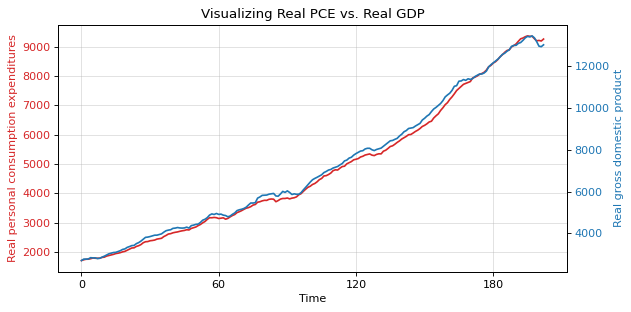

In [4]:
x = data.index
y1 = data['realcons']
y2 = data['realgdp']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(8,4), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=10)
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.set_ylabel('Real personal consumption expenditures', color='tab:red', fontsize=10)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Real gross domestic product", color='tab:blue', fontsize=10)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Visualizing Real PCE vs. Real GDP", fontsize=12)
fig.tight_layout()
plt.show()

In [5]:
grangers_causation_matrix(data, variables = data.columns, maxlag = 4)

,realgdp_x,realcons_x
realgdp_y,1.0000,0.0
realcons_y,0.0095,1.0


In [6]:
grangercausalitytests(data, maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1851  , p=0.6675  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=0.1879  , p=0.6646  , df=1
likelihood ratio test: chi2=0.1878  , p=0.6647  , df=1
parameter F test:         F=0.1851  , p=0.6675  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=22.9218 , p=0.0000  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=47.0132 , p=0.0000  , df=2
likelihood ratio test: chi2=42.2456 , p=0.0000  , df=2
parameter F test:         F=22.9218 , p=0.0000  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=20.8505 , p=0.0000  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=64.8202 , p=0.0000  , df=3
likelihood ratio test: chi2=56.1467 , p=0.0000  , df=3
parameter F test:         F=20.8505 , p=0.0000  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=16.8883 , p=0.0000  

{1: ({'ssr_ftest': (0.18513457660722363, 0.6674629046854812, 199.0, 1),
   'ssr_chi2test': (0.18792555012391546, 0.6646488014184582, 1),
   'lrtest': (0.18783818843076006, 0.6647219979742095, 1),
   'params_ftest': (0.18513457660730906, 0.6674629046854064, 199.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (22.921847866320178, 1.134194262149373e-09, 196.0, 2),
   'ssr_chi2test': (47.01317776663628, 6.183269269577058e-11, 2),
   'lrtest': (42.24557154285458, 6.706419208308308e-10, 2),
   'params_ftest': (22.921847866321272, 1.134194262148368e-09, 196.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (20.850481888793283, 9.59659133627235e-12, 193.0, 3),
   'ssr_chi2test': (64.82015094961642, 5.48061832662784e-14, 3),
   'lrtest': (56.146710674355745, 3.9087429758080245e-12, 3),
   'params_ftest': (20.850481888793315, 9.596591336271936e-12, 193.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],

In [7]:
# What does each test mean? What is SSR?
# What is Wald Test?
# How do you run Granger causality test with multivariate system?